### Assignment 01

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### 01 - Impact of Outliers on Linear Regression

Optimal Weights: [ 3.91672727 -3.55727273]


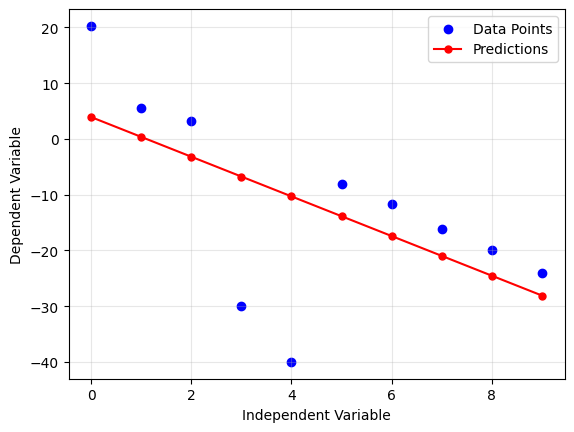

In [ ]:
# Load the data set
x = np.arange(10).T
y = np.array([20.26, 5.61, 3.14, -30, -40, -8.13, -11.73, -16.08, -19.95, -24.03]).T

N = len(x)

# Construct a matrix X with each data point in one row, and each column representing a feature
# The first entry of each row will be 1
X = np.ones((N, 2))
X[:, 1] = x

# We want to choose a matrix of weights w such that (y - xW)^T * (y - xW) is minimized
# The w that minimizes the above is
w_OLS = np.linalg.inv(X.T @ X) @ X.T @ y

y_hat = X @ w_OLS

plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(y_hat, label='Predictions', color='red', markevery=x, marker='o', markersize=5)

plt.legend()
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.grid(True, alpha=0.3)

plt.show()

Model [12 -4]
	 Loss for beta = 1      : 0.435416262490386
	 Loss for beta = 1e-06  : 0.9999999998258207
	 Loss for beta = 1000.0 : 0.0002268287498440988
Model [ 3.91 -3.55]
	 Loss for beta = 1      : 0.9728470518681676
	 Loss for beta = 1e-06  : 0.9999999999999718
	 Loss for beta = 1000.0 : 0.00018824684654645654


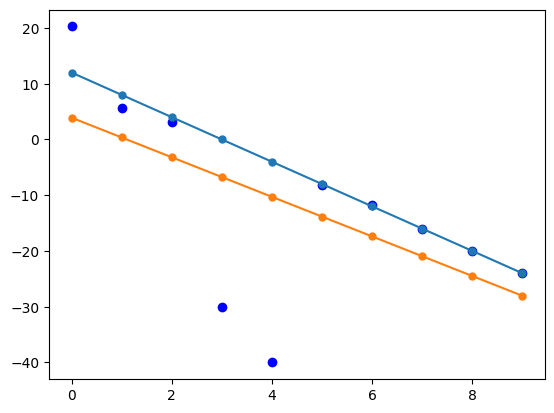

In [ ]:
plt.scatter(x, y, label='Data Points', color='red')

# Set up the weight vectors representing the two given modelss
w_1 = np.array([12, -4])
w_2 = np.array([3.91, -3.55])

# Iterate through each model
for w in [w_1, w_2]:
    print ("Model", w)

    # Run the model on the data and find the residuals
    y_hat = X @ w
    residuals = y - y_hat

    plt.plot(y_hat, label='Predictions', markevery=x, marker='o', markersize=5)

    # Vary beta through each of the given values and find the loss
    for beta in [1, 1E-6, 1E3]:
        loss = (1 / N) * np.sum((residuals ** 2) / (residuals ** 2 + beta ** 2))

        print ("\t Loss for beta =", "{:<6}".format(beta), ":", loss)

plt.show()

#### 03 - Data Pre-Processing

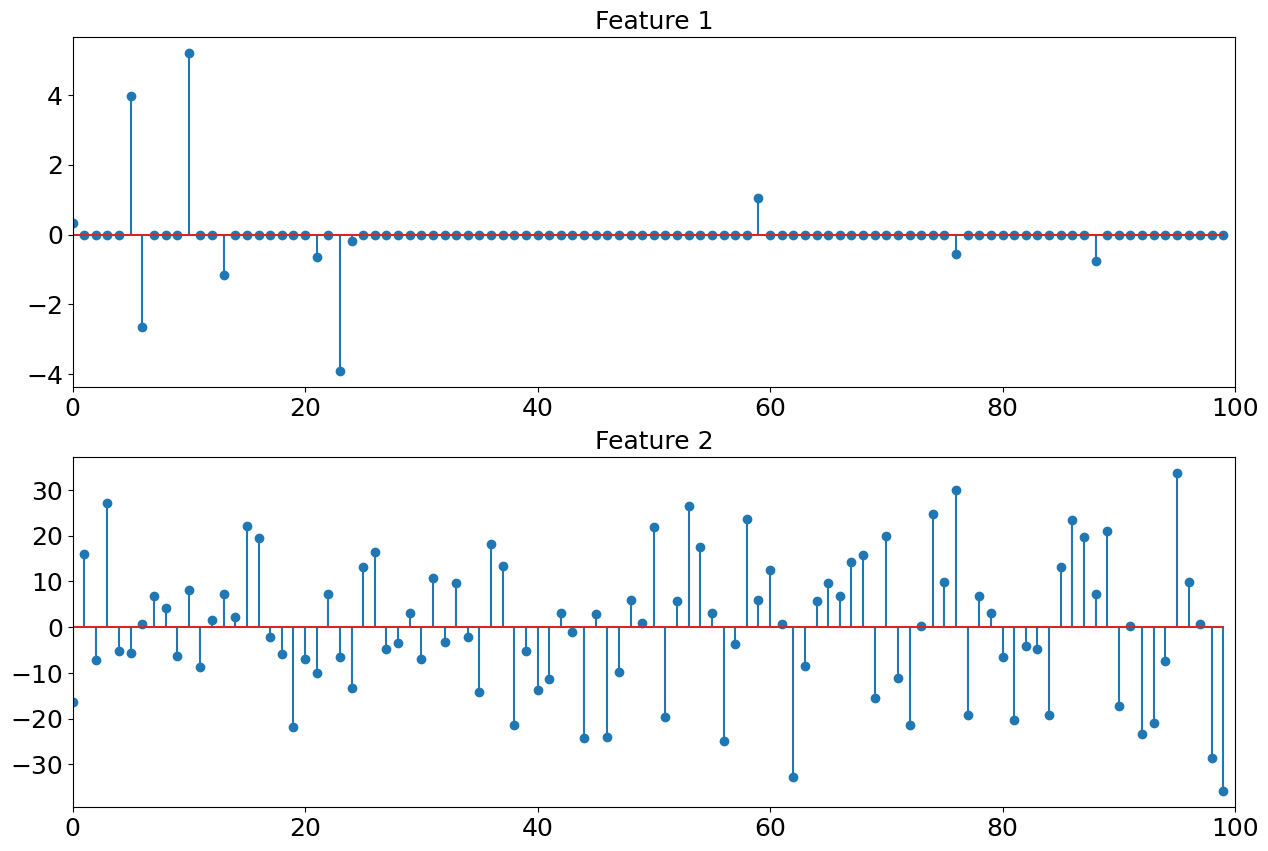

In [22]:
# Given code
def generate_signal (signal_length , num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace = False)
    nonzero_values = 10* np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non - zero elements in the signal
your_index_no = 220658 # Enter your index no. without english letters and without leading zeros

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

epsilon = np.random.normal (0, 15, signal_length)
# epsilon = epsilon[:, np.newaxis]

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.xlim(0 ,signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x - axis tick label font size
plt.yticks(fontsize=18)
plt.show()